In [1]:
import numpy as np
import plotly.express as px
import pandas as pd
from functions.common_functions import *
import plotly.io as pio


In [2]:
df_ee = pd.read_csv("../Data/Virtualpredictions.csv")
df_ee= df_ee.loc[df_ee['N Catalyst Substituent'] == "NS(=O)(=O)C(F)(F)F"]

In [3]:
df_ee

,Unnamed: 0,nucleophile SMILES,starting electrophile SMILES,"3,3 Catalyst Substituent",N Catalyst Substituent,ddg,ee,cluster
0,0,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,c2ccc1ccccc1c2,NS(=O)(=O)C(F)(F)F,1.186380,0.910254,10
5,5,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,c1ccc3c(c1)CCc2ccccc23,NS(=O)(=O)C(F)(F)F,1.122075,0.894925,10
10,10,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,Cc1cc(C)c2ccc4cccc3ccc1c2c34,NS(=O)(=O)C(F)(F)F,1.345681,0.939563,10
15,15,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,c1ccccc1,NS(=O)(=O)C(F)(F)F,1.014781,0.863730,10
20,20,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,Cc1ccccc1,NS(=O)(=O)C(F)(F)F,1.084011,0.884717,10
...,...,...,...,...,...,...,...,...
363975,363975,C1=CCCC=C1,C=CC=O,FC(F)(F)C(F)(c1cccc(C(F)(C(F)(F)F)C(F)(F)F)c1)...,NS(=O)(=O)C(F)(F)F,1.380920,0.944666,1
363980,363980,C1=CCCC=C1,C=CC=O,c2cccc(c1ccccc1)c2,NS(=O)(=O)C(F)(F)F,1.189611,0.910965,1
363985,363985,C1=CCCC=C1,C=CC=O,FS(F)(F)(F)(F)c1ccccc1,NS(=O)(=O)C(F)(F)F,1.370957,0.943267,1
363990,363990,C1=CCCC=C1,C=CC=O,c4ccc3c1ccccc1C2(CCC2)c3c4,NS(=O)(=O)C(F)(F)F,1.434305,0.951607,1


In [4]:
df_ee["Reaction"]=df_ee["nucleophile SMILES"]+df_ee["starting electrophile SMILES"]

df_ee['3,3 Catalyst Substituent '].unique()


array(['c2ccc1ccccc1c2', 'c1ccc3c(c1)CCc2ccccc23',
       'Cc1cc(C)c2ccc4cccc3ccc1c2c34', 'c1ccccc1', 'Cc1ccccc1',
       'CC(C)(C)c1ccccc1', 'c4ccc3c1ccccc1c2ccccc2c3c4',
       'FC(F)(F)c1cccc(C(F)(F)F)c1', 'CC3(C)c1ccccc1c2ccccc23',
       'c1cccc2ccccc12', 'Cc1cc(C)ccc1', 'CCc1cccc(CC)c1',
       'CCCc1cccc(CCC)c1', 'CCCCCCc1cccc(CCCCCC)c1',
       'Cc1cc(C)c2CCc4cccc3CCc1c2c34', 'CC(C)CCc1cccc(CCC(C)C)c1',
       'Cc1cccc(C)c1C', 'c4ccc3c1ccccc1C2(CCCC2)c3c4',
       'FS(F)(F)(F)(F)c1cccc(S(F)(F)(F)(F)F)c1',
       'FC(F)(F)C(F)(F)C(F)(F)c1cccc(C(F)(F)C(F)(F)C(F)(F)F)c1',
       'FC(F)(F)C(F)(c1cccc(C(F)(C(F)(F)F)C(F)(F)F)c1)C(F)(F)F',
       'c2cccc(c1ccccc1)c2', 'FS(F)(F)(F)(F)c1ccccc1',
       'c4ccc3c1ccccc1C2(CCC2)c3c4', 'c3ccc2ccc1ccccc1c2c3'], dtype=object)

# Create IDs for 3,3' substituents

In [5]:
unique_values = np.unique(df_ee['3,3 Catalyst Substituent '])
name_mapping = {value: f'S {i+1}' for i, value in enumerate(unique_values)}

# Replace the column values with their 'S_i' names
df_ee['3,3 Catalyst Substituent '] = df_ee['3,3 Catalyst Substituent '].map(name_mapping)

# Create a dictionary to show the mapping
mapping_dict = {'Original Entry': unique_values, 'Translated ID': [name_mapping[value] for value in unique_values]}

# Convert the dictionary to a DataFrame
mapping_df = pd.DataFrame(mapping_dict)
mapping_df.to_csv("../Data/Catalyst_dictionary.csv")
mapping_df

,Original Entry,Translated ID
0,CC(C)(C)c1ccccc1,S 1
1,CC(C)CCc1cccc(CCC(C)C)c1,S 2
2,CC3(C)c1ccccc1c2ccccc23,S 3
3,CCCCCCc1cccc(CCCCCC)c1,S 4
4,CCCc1cccc(CCC)c1,S 5
5,CCc1cccc(CC)c1,S 6
6,Cc1cc(C)c2CCc4cccc3CCc1c2c34,S 7
7,Cc1cc(C)c2ccc4cccc3ccc1c2c34,S 8
8,Cc1cc(C)ccc1,S 9
9,Cc1cccc(C)c1C,S 10


In [6]:
df_ee

,Unnamed: 0,nucleophile SMILES,starting electrophile SMILES,"3,3 Catalyst Substituent",N Catalyst Substituent,ddg,ee,cluster,Reaction
0,0,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,S 20,NS(=O)(=O)C(F)(F)F,1.186380,0.910254,10,C=CC[Si](C)(C)CO=Cc2ccc1ccccc1c2
5,5,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,S 17,NS(=O)(=O)C(F)(F)F,1.122075,0.894925,10,C=CC[Si](C)(C)CO=Cc2ccc1ccccc1c2
10,10,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,S 8,NS(=O)(=O)C(F)(F)F,1.345681,0.939563,10,C=CC[Si](C)(C)CO=Cc2ccc1ccccc1c2
15,15,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,S 19,NS(=O)(=O)C(F)(F)F,1.014781,0.863730,10,C=CC[Si](C)(C)CO=Cc2ccc1ccccc1c2
20,20,C=CC[Si](C)(C)C,O=Cc2ccc1ccccc1c2,S 11,NS(=O)(=O)C(F)(F)F,1.084011,0.884717,10,C=CC[Si](C)(C)CO=Cc2ccc1ccccc1c2
...,...,...,...,...,...,...,...,...,...
363975,363975,C1=CCCC=C1,C=CC=O,S 13,NS(=O)(=O)C(F)(F)F,1.380920,0.944666,1,C1=CCCC=C1C=CC=O
363980,363980,C1=CCCC=C1,C=CC=O,S 21,NS(=O)(=O)C(F)(F)F,1.189611,0.910965,1,C1=CCCC=C1C=CC=O
363985,363985,C1=CCCC=C1,C=CC=O,S 16,NS(=O)(=O)C(F)(F)F,1.370957,0.943267,1,C1=CCCC=C1C=CC=O
363990,363990,C1=CCCC=C1,C=CC=O,S 23,NS(=O)(=O)C(F)(F)F,1.434305,0.951607,1,C1=CCCC=C1C=CC=O


# Generality

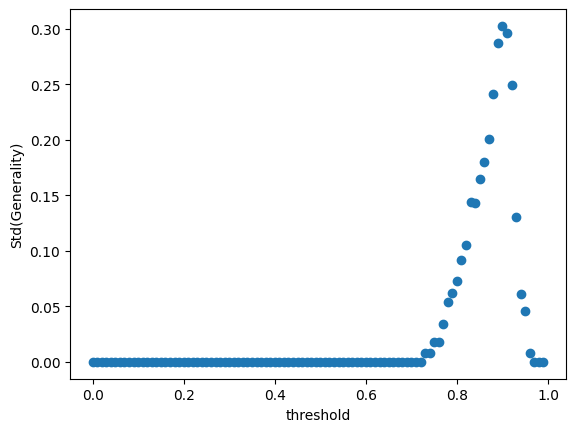

In [7]:
import matplotlib.pyplot as plt

cats = df_ee['3,3 Catalyst Substituent '].unique()
diversity =[]
threshold =[]
generality_df = pd.DataFrame(columns=cats)
id=0
for i in np.arange(0,1,0.01):
    
    cat_list = []
    gen_list = []
    cluster_list = []
    cluster_ee_list = []
    for cat in cats:
        generality, clusters, cluster_ee = calc_generality(df_ee,cat,'3,3 Catalyst Substituent ','ee', df_ee['cluster'], i)
        cat_list.append(cat)
        gen_list.append(generality)
        cluster_list.append(clusters)
        cluster_ee_list.append(cluster_ee)
    diversity.append(np.std(gen_list))
    generality_df.loc[id] = gen_list
    threshold.append(i)
    id+=1

plt.scatter(threshold,diversity)
plt.xlabel('threshold')

plt.ylabel('Std(Generality)')

opt_threshold = np.argmax(diversity)

In [8]:
opt_threshold

90

In [9]:
## Calculate Generality ##
cats = df_ee['3,3 Catalyst Substituent '].unique()
cat_list = []
gen_list = []
cluster_list = []
cluster_ee_list = []
for cat in cats:
    generality, clusters, cluster_ee = calc_generality(df_ee,cat,'3,3 Catalyst Substituent ','ee', df_ee['cluster'],threshold[opt_threshold])
    cat_list.append(cat)
    gen_list.append(generality)
    cluster_list.append(clusters)
    cluster_ee_list.append(cluster_ee)

gen = pd.Series(gen_list,cat_list)
gen = gen.sort_values(ascending=True)
fig = px.bar(x=gen, y=gen.index, title='Generality',
            labels={'x':'Catalyst Class', 'y':'Generality'},
            template='simple_white', orientation='h',
            color_discrete_sequence=[px.colors.qualitative.T10[0],
            px.colors.qualitative.T10[0],
            px.colors.qualitative.T10[4]],
            width=980, height=720,
                )


                


fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=12,xaxis_title='Generality', yaxis_title='Catalyst', 
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()


In [10]:
gen.to_csv("../Data/Generality_IDPi.csv")

# Genrality at different Thresholds

In [11]:
fig = px.line(generality_df)

# Customize the layout
fig.update_layout(xaxis_title='Threshold', yaxis_title='Generality', legend_title=None, xaxis_tickangle=-4,template='simple_white',width=980, height=720,
                  )

# Show the plot
fig.show()

# ee Distribution

In [12]:
diversity =[]
threshold =[]
percentage_df = pd.DataFrame(columns=cats)
id=0
def calculate_percent(data,p,q):
    data1 = data[data< q]
    percent = len(data1[data1>= p])/len(data)
    return percent

old=0
for i in np.arange(0,1,0.01):
    cats = df_ee['3,3 Catalyst Substituent '].unique()
    cat_list = []
    gen_list = []
    cluster_list = []
    cluster_ee_list = []
    if i>0:
        percentage = df_ee.groupby('3,3 Catalyst Substituent ')['ee'].apply(calculate_percent, old,i)
        gen_list=percentage
            
        diversity.append(np.std(gen_list))
        percentage_df.loc[id] = gen_list
        threshold.append(i)
    id+=1
    old=i

In [13]:
fig = px.line(percentage_df)

# Customize the layout
fig.update_layout(xaxis_title='ee', yaxis_title='Frequency', legend_title=None, xaxis_tickangle=-4,template='simple_white',width=980, height=720,
                  )

# Show the plot
fig.show()

# Risk Metrics

In [14]:

def calculate_var_es(data):
    var = np.percentile(data, 100 * (1 - 0.9))
    tail_losses = data[data < var]
    es = tail_losses.mean()
    return pd.Series({'VAR': var, 'ES': es})

results = df_ee.groupby('3,3 Catalyst Substituent ')['ee'].apply(calculate_var_es).reset_index()
results = results.sort_values(by="ee",ascending=True)


fig = px.bar(results, y='3,3 Catalyst Substituent ', x='ee', title='VAR and ES by Catalyst',
             labels={'variable': 'Metric', 'value': 'Value'}, barmode='group',color='level_1',template='simple_white',)
fig.update_layout(
    font_size=8,
)
# Customize the layout
fig.update_layout(xaxis_title='VaR & ES', yaxis_title='Catalyst', legend_title=None, xaxis_tickangle=0)

# Show the plot
fig.show()
results.to_csv("../Data/Risk_IDPi.csv")

# Dominance

In [15]:
df_ee['Normalized_rank'] = (df_ee.groupby('Reaction')['ee'].transform(lambda g: (g-g.min())/(g.max()-g.min())))
mean_quant = df_ee.groupby(['3,3 Catalyst Substituent ',"cluster"])['Normalized_rank'].mean()
df_split =  pd.DataFrame(mean_quant)

Dominance = df_split.groupby(['3,3 Catalyst Substituent ' ])['Normalized_rank'].mean()
Dominance = Dominance.sort_values( ascending=True)

fig = px.bar(x=Dominance, y=Dominance.index,
                title='Dominance',
                barmode='group',
                labels={'Catalyst_Type':'Catalyst Class', '3,3 Catalyst Substituent ':'Catalyst'},
                template='simple_white', orientation='h',
                color_discrete_sequence=[px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[0],
                px.colors.qualitative.T10[4]],
                  width=980, height=720,
                )

fig.update_xaxes(mirror=True)
fig.update_yaxes(mirror=True)

fig.update_layout(
    font_size=12,xaxis_title='Dominance', yaxis_title='Catalyst', 
)

fig.update_layout(
    legend=dict(
        yanchor="bottom",
        y=1.01,
        xanchor="left",
        x=0.01,
        orientation='h',
    ),
    legend_title_text=''
)


fig.show()



In [16]:
Dominance.to_csv("../Data/Dominance_IDPi.csv")